### Imports

In [1]:
# imports
from feature_processor import *
from lstm import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/7_lstm'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

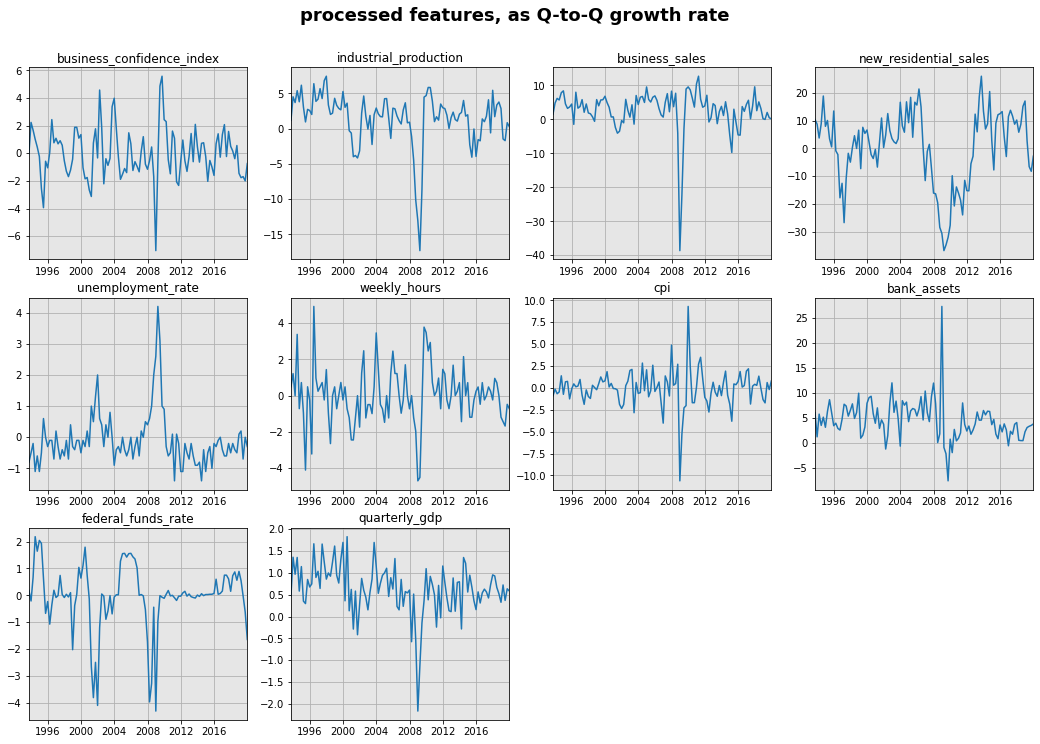

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113
1994-03-31,1.67461,3.695746,6.177410,3.742247,-0.2,-0.009381,-0.671583,5.767958,0.67,0.970216
1994-06-30,1.01670,5.385214,5.706889,8.908318,-1.1,3.377695,-0.459493,3.522080,2.18,1.355046
1994-09-30,0.45180,3.808076,7.841516,18.823001,-0.6,-0.719138,1.381100,5.161621,1.64,0.584515
1994-12-31,-0.23480,6.156890,8.395498,7.938450,-1.1,0.719138,-0.734759,3.148223,2.04,1.145524


### LSTM VAR model

In [5]:
# number of lags for the model
p = 2
# number of layers
layers = 1
# number of units per layer
units = 3
# number of epochs for training
epochs = 100

In [6]:
# grid search parameters (for number of layers and units)
layer_grid = [1, 2, 3]
unit_grid = [1, 2, 3, 5, 10, 20, 50]

In [7]:
# declare lstm VAR
lstm = Lstm_Var(feature_dataframe = features)
# generate regressors
lstm.regressors(p)
# optimize number of layers and units with grid search
layers, units = lstm.grid_search(layer_grid, unit_grid)

optimal number of layers: 1
optimal number of units: 50


In [8]:
# train the model
lstm.train(layers, units, epochs)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 50)                14200     
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
Total params: 14,710
Trainable params: 14,710
Non-trainable params: 0
_________________________________________________________________
Train on 104 samples
Epoch 1/100
104/104 [==============================] - 3s 24ms/sample - loss: 1.0279
Epoch 2/100
104/104 [==============================] - 0s 189us/sample - loss: 0.9870
Epoch 3/100
104/104 [==============================] - 0s 171us/sample - loss: 0.9782
Epoch 4/100
104/104 [==============================] - 0s 186us/sample - loss: 0.9634
Epoch 5/100
104

104/104 [==============================] - 0s 164us/sample - loss: 0.4291
Epoch 87/100
104/104 [==============================] - 0s 169us/sample - loss: 0.4186
Epoch 88/100
104/104 [==============================] - 0s 169us/sample - loss: 0.4219
Epoch 89/100
104/104 [==============================] - 0s 129us/sample - loss: 0.3861
Epoch 90/100
104/104 [==============================] - 0s 133us/sample - loss: 0.3998
Epoch 91/100
104/104 [==============================] - 0s 185us/sample - loss: 0.3975
Epoch 92/100
104/104 [==============================] - 0s 157us/sample - loss: 0.3903
Epoch 93/100
104/104 [==============================] - 0s 181us/sample - loss: 0.3934
Epoch 94/100
104/104 [==============================] - 0s 135us/sample - loss: 0.4040
Epoch 95/100
104/104 [==============================] - 0s 157us/sample - loss: 0.3853
Epoch 96/100
104/104 [==============================] - 0s 127us/sample - loss: 0.3884
Epoch 97/100
104/104 [==============================] - 

### Predictions

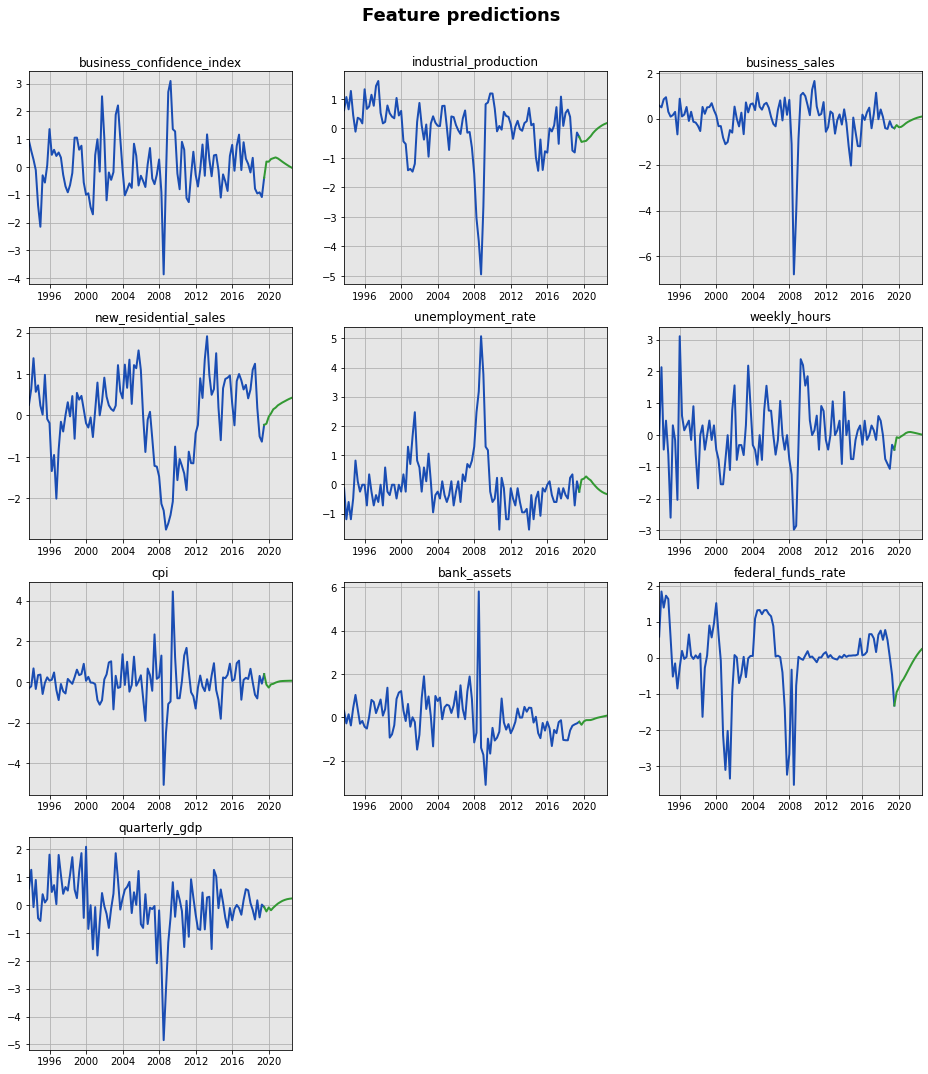

In [9]:
# number of periods ahead to forecast (in quarters)
h = 12
# generate predictions
lstm.forecast(h)
# plot predictions
lstm.plot_forecast()